In [1]:
from __future__ import division

In [6]:
import matplotlib.pyplot as plt
import numpy as np

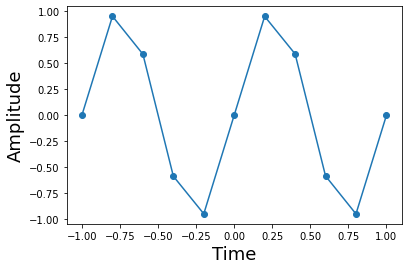

In [10]:
fig,ax = plt.subplots()
pi = 3.14
f = 1.0 # Hz, signal frequency
fs = 5.0 # Hz, sampling rate (ie. >= 2*f)
t = np.arange(-1,1+1/fs,1/fs) # sample interval, symmetric
# for convenience later
x = np.sin(2*pi*f*t)
ax.plot(t,x,"o-")
ax.set_xlabel("Time",fontsize=18);
ax.set_ylabel("Amplitude",fontsize=18);

Text(0, 0.5, 'Amplitude')

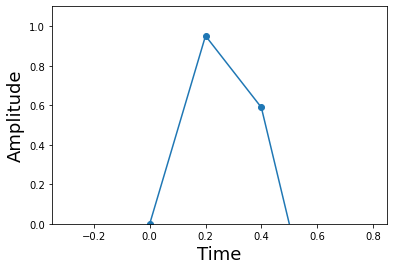

In [11]:
fig,ax = plt.subplots()
ax.plot(t,x,'o-')
ax.axis(xmin = 1/(4*f)-1/fs*3,
    xmax = 1/(4*f)+1/fs*3,
    ymin = 0,
    ymax = 1.1 )

ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)

In [27]:
interval = [] # piecewise domains
apprx = [] # line on domains
# build up points *evenly* inside of intervals
tp = np.hstack([np.linspace(t[i],t[i + 1],20,False) for i in range(len(t) - 1)])
# construct arguments for piecewise
for i in range(len(t) - 1):
    interval.append(np.logical_and(t[i] <= tp,tp < t[i + 1]))

apprx.append((x[i + 1] - x[i]) / (t[i + 1] - t[i]) * (tp[interval[-1]] - t[i]) + x[i])

x_hat = np.piecewise(tp, interval[0], apprx) # piecewise linear approximation


In [26]:
interval[0].shape

(200,)

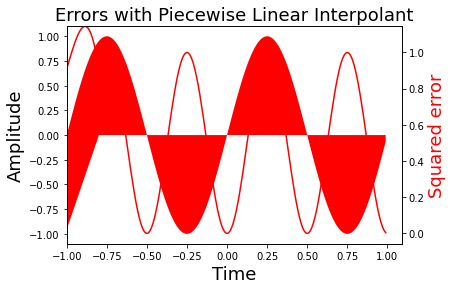

In [31]:
fig,ax1 = plt.subplots()
# fill in the difference between the interpolant and the sine
ax1.fill_between(tp,x_hat,np.sin(2 * pi * f * tp),facecolor='red')
ax1.set_xlabel('Time',fontsize = 18)
ax1.set_ylabel('Amplitude',fontsize = 18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat - np.sin(2 * pi * f * tp)) ** 2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max())
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18);